# **NLP - TP 1 Parte 2**

Augusto Rabbia

# Importar datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile
import os
with zipfile.ZipFile('/content/datos_Parks.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        if os.path.basename(root).startswith('.'): # Eliminar ipynb checkpoint
            continue
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
list_files('/content/datos')

datos/
    relaciones/
        relaciones_parks.csv
    informacion/
        htp_videos_es_6.txt
        precios_parks.txt
        texto_foros_strategy.txt
        htp_videos_es_7.txt
        texto_misutmeeple_contenido.txt
        texto_foros_variants.txt
        htp_videos_es_5.txt
        reviews_videos_en_3.txt
        reviews_videos_en_2.txt
        htp_videos_es_4.txt
        htp_videos_es_1.txt
        reviews_videos_en_1.txt
        reviews_videos_es_4.txt
        reglas_pdf_espanol.txt
        texto_misutmeeple_introduccion.txt
        htp_videos_es_3.txt
        reviews_videos_es_5.txt
        htp_videos_es_2.txt
        reviews_videos_es_3.txt
        reviews_videos_es_2.txt
        texto_misutmeeple_opinion.txt
        reglas_pdf_ingles.txt
        reviews_videos_es_1.txt
        texto_foros_rules.txt
        descripcion_juego.txt
        texto_misutmeeple_mecanica.txt
        texto_foros_news.txt
    estadisticas/
        stats.csv
        reseñas_parks.csv
        credits

### Relaciones

Primero leemos la sección de relaciones.

In [3]:
df_rels = pd.read_csv('/content/datos/relaciones/relaciones_parks.csv')
print(df_rels.info())
df_rels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SUJETO1   44 non-null     object
 1   RELACION  44 non-null     object
 2   SUJETO2   44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB
None


,SUJETO1,RELACION,SUJETO2
0,PARKS,Primary Name,PARKS
1,PARKS,Alternate Names,Parki
2,PARKS,Alternate Names,PARKY
3,PARKS,Alternate Names,Парки
4,PARKS,Alternate Names,國家公園：自然之旅


### Estadísticas

Ahora, estadísticas.

In [4]:
df_stats = pd.read_csv('/content/datos/estadisticas/stats.csv')
print(df_stats.info())
df_stats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Título       18 non-null     object
 1   Descripción  18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes
None


,Título,Descripción
0,Avg. Rating,7.646
1,No. of Ratings,"28,119"
2,Std. Deviation,1.22
3,Weight,2.12/ 5
4,Comments,"4,245"


In [5]:
df_stats_reviews = pd.read_csv('/content/datos/estadisticas/reseñas_parks.csv')
print(df_stats_reviews.info())
df_stats_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   puntaje  469 non-null    float64
 1   reseña   500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


,puntaje,reseña
0,5.0,I can often feel upon finishing a rulebook whe...
1,8.0,"I have the original version with the original,..."
2,7.0,I really like this game. I think it's got enou...
3,7.3,I love the National Parks. The art in this gam...
4,8.0,"Both expansions, promo card and upgraded piece..."


In [6]:
df_stats_credits = pd.read_csv('/content/datos/estadisticas/credits.csv')
print(df_stats_credits.info())
df_stats_credits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nombre Primario       1 non-null      object
 1   Nombres Alternativos  1 non-null      object
 2   Lanzamiento           1 non-null      int64 
 3   Diseñador             1 non-null      object
 4   Publicado por         1 non-null      object
 5   Editor                1 non-null      object
 6   Insert Designers      1 non-null      object
 7   Categorias            1 non-null      object
 8   Mecanismos            1 non-null      object
 9   Familia               1 non-null      object
 10  Jugadores             1 non-null      object
 11  Tiempo de juego       1 non-null      object
 12  Edad                  1 non-null      object
 13  Complejidad           1 non-null      object
dtypes: int64(1), object(13)
memory usage: 244.0+ bytes
None


,Nombre Primario,Nombres Alternativos,Lanzamiento,Diseñador,Publicado por,Editor,Insert Designers,Categorias,Mecanismos,Familia,Jugadores,Tiempo de juego,Edad,Complejidad
0,PARKS,Parki PARKY Парки 國家公園：自然之旅,2019,Henry Audubon,Artist Fifty-Nine Parks Print Series,Travis D. Hill,Noah Adelman Bryce Cook,Animals Economic Environmental Travel,Mechanisms Contracts End Game Bonuses Events M...,Components: Game Trayz Inside Components: Meep...,1–5,30–60 Min,10+,2.12 / 5


### Datos de texto

Finalmente, leemos los documentos de texto

In [7]:
tutoriales = []
descripcion = ""
precios = ""
reglas = []
reviews = []
foros_dict = {"category": [], "text": []}
mm_contenido_y_tutorial = ""
mm_opinion = ""
for root, _, files in os.walk('/content/datos'):
    for file in files:
        # Leer descripcion
        if file == "descripcion_juego.txt":
            with open(os.path.join(root, file), 'r') as f:
                descripcion = f.read()
        # Leer precios
        elif file == "precios_parks.txt":
            with open(os.path.join(root, file), 'r') as f:
                precios = f.read()
        # Leer videotutoriales
        elif file.startswith('htp'):
            with open(os.path.join(root, file), 'r') as f:
                tutoriales.append(f.read())
        # Leer reglas - Sólo leemos las reglas
        elif file.startswith('reglas'):
            with open(os.path.join(root, file), 'r') as f:
                reglas.append(f.read())
        # Leer reviews
        elif file.startswith('reviews'):
            with open(os.path.join(root, file), 'r') as f:
                reviews.append(f.read())
        # Texto foros
        elif file.startswith('texto_foros'):
            with open(os.path.join(root, file), 'r') as f:
                foros_dict["category"].append(file.split("_")[-1][:-4])
                foros_dict["text"].append(f.read())
        # Texto contenido misutmeeple
        elif file == "texto_misutmeeple_contenido.txt" or file == "texto_misutmeeple_mecanica.txt":
            with open(os.path.join(root, file), 'r') as f:
                mm_contenido_y_tutorial += '\n' + f.read()
        elif file == "texto_misutmeeple_opinion.txt":
            with open(os.path.join(root, file), 'r') as f:
                mm_opinion = f.read()

df_foros = pd.DataFrame.from_dict(foros_dict)
reviews.append(mm_opinion)
tutoriales.append(mm_contenido_y_tutorial)

#### Breve exploración del dataset

In [8]:
# Descripción
len(descripcion), descripcion[:100]

(1152,
 'PARKS is a celebration of the US National Parks featuring illustrious art from Fifty-Nine Parks.\nIn ')

In [9]:
# Texto de foros
df_foros

,category,text
0,strategy,There seem to be two running ideas on the Park...
1,variants,I don't find that canteen card (nor any other ...
2,rules,There should be only 3 Parks face up available...
3,news,Ein Nachdruck für die deutsche Ausgabe war urs...


In [10]:
# Precios
len(precios), precios[:50]

(126, '$65.00 at Noble Knight Games \n$63.99 at K&B Hobbie')

In [11]:
# Reviews
len(reviews), f"Longitud promedio de reviews: {int(np.mean([len(x) for x in reviews]))}"

(9, 'Longitud promedio de reviews: 13325')

In [12]:
# Tutoriales
len(tutoriales), f"Longitud promedio de tutoriales: {int(np.mean([len(x) for x in tutoriales]))}"

(8, 'Longitud promedio de tutoriales: 19151')

In [13]:
# Reglas
len(reglas), f"Longitud promedio de reglas: {int(np.mean([len(x) for x in reglas]))}"

(2, 'Longitud promedio de reglas: 17114')

# Ejercicio 2

Embedding de un texto

Se eligió el texto de la descripción, al ser largo, pero a su vez no demasiado grande, permitiendo que sea analizable en su totalidad.

Además, es un texto en inglés y con puntuación, lo cual hace más sencilla la interpretación de sus subfrases para un humano.

In [14]:
# Splitting y Embedding, con Universal Sentence Encoder
from langchain.text_splitter import RecursiveCharacterTextSplitter
import tensorflow_text as text
import tensorflow_hub as hub
# Análisis de similitud
import random
from sklearn.metrics.pairwise import cosine_similarity
# No utilizo la función de sklearn de jaccard porque requiere que los conjuntos tengan la misma longitud, lo cual es necesario en nuestro análisis
def jaccard_similarity(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0
def dice_similarity(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a) + len(set_b)
    return 2.0 * intersection / union
# Visualización
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Text Splitting y Embedding

Splitting

In [15]:
chunk_size = 100
chunk_overlap = 10
text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=[".", "?", "!"]
    )
desc_split = text_splitter.split_text(descripcion)

print(f"{len(desc_split)} fragmentos")
print(f"Promedio de longitud de fragmentos {int(np.mean([len(x) for x in desc_split]))}")
# Remover puntuación
desc_split = [x.replace(".", "").replace("!", "").replace("?", "").replace(",", "") for x in desc_split]
desc_split

12 fragmentos
Promedio de longitud de fragmentos 95


['PARKS is a celebration of the US National Parks featuring illustrious art from Fifty-Nine Parks',
 '\nIn PARKS players will take on the role of two hikers as they trek through different trails across four seasons of the year',
 ' While on the trail these hikers will take actions and collect memories of the places your hikers visit',
 ' These memories are represented by various resource tokens like mountains and forests',
 ' Collecting these memories in sets will allow players to trade them in to visit a National Park at the end of each hike',
 '\nEach trail represents one season of the year and each season the trails will change and grow steadily longer',
 ' The trails represented by tiles get shuffled in between each season and laid out anew for the next round',
 ' Resources can be tough to come by especially when someone is at the place you’re trying to reachPARKS',
 ' Campfires allow you to share a space and time with other hikers',
 ' Canteens and Gear can also be used to improve

Embedding

In [16]:
get_embeddings = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [17]:
desc_embedded_tensor = get_embeddings(desc_split)
desc_embedded = [x.numpy() for x in desc_embedded_tensor]
print(f"Se obtienen embeddings {desc_embedded[0].shape[0]}-dimensionales de las frases.")
desc_embedded[0][:15]

Se obtienen embeddings 512-dimensionales de las frases.


array([-0.06051693, -0.03006955,  0.0488274 , -0.03302161,  0.02120978,
        0.01459734, -0.0119577 , -0.04838964,  0.04122069, -0.02216415,
        0.05132851, -0.04109515,  0.03341354, -0.05912302, -0.05125033],
      dtype=float32)

## Análisis de similitud

In [18]:
def analizar_similitudes(frases, sets_palabras, embeddings):
    frase_base_set = sets_palabras[0]
    frase_base_embed = embeddings[0]
    print(f"Frase base: {frases[0]}")
    for i, frase in enumerate(sets_palabras[1:]):
        print(f"Frase {i+1}: {frases[i+1]}")
        print(f"Similitud coseno: {cosine_similarity([frase_base_embed], [embeddings[i+1]])[0][0]}")
        print(f"Distancia euclediana: {np.linalg.norm(frase_base_embed - embeddings[i+1])}")
        print(f"Similitud Jaccard: {jaccard_similarity(sets_palabras[0], sets_palabras[i+1])}")
        print(f"Similitud Dice: {dice_similarity(sets_palabras[0], sets_palabras[i+1])}")
        print()

Elegimos aleatoriamente 1 frase base y 5 frases aleatorias y vemos su similitud utilizando diferentes métricas.

In [19]:
random.seed(42)
elegidas = random.sample(range(len(desc_split)), k=6)
# Construimos sets de palabras de las frases
sets_palabras = [set(frase.split()) for frase in [desc_split[i] for i in elegidas]]
# Obtenemos los embeddings de las frases
embeddings = [desc_embedded[i] for i in elegidas]
# Obtenemos las frases originales para visualizar las comparaciones
frases = [desc_split[i] for i in elegidas]
# Comparamos
analizar_similitudes(frases, sets_palabras, embeddings)

Frase base:  It’ll be tough to manage building up your engine versus spending resources on parks but we bet you’re up to the challenge
Frase 1: 
In PARKS players will take on the role of two hikers as they trek through different trails across four seasons of the year
Similitud coseno: 0.18191330134868622
Distancia euclediana: 1.2791298627853394
Similitud Jaccard: 0.05128205128205128
Similitud Dice: 0.0975609756097561

Frase 2: PARKS is a celebration of the US National Parks featuring illustrious art from Fifty-Nine Parks
Similitud coseno: 0.19675830006599426
Distancia euclediana: 1.267471194267273
Similitud Jaccard: 0.030303030303030304
Similitud Dice: 0.058823529411764705

Frase 3:  Collecting these memories in sets will allow players to trade them in to visit a National Park at the end of each hike
Similitud coseno: 0.19406577944755554
Distancia euclediana: 1.2695938348770142
Similitud Jaccard: 0.05128205128205128
Similitud Dice: 0.0975609756097561

Frase 4:  These memories are repre

In [20]:
random.seed(1)
elegidas = random.sample(range(len(desc_split)), k=6)
# Construimos sets de palabras de las frases
sets_palabras = [set(frase.split()) for frase in [desc_split[i] for i in elegidas]]
# Obtenemos los embeddings de las frases
embeddings = [desc_embedded[i] for i in elegidas]
# Obtenemos las frases originales para visualizar las comparaciones
frases = [desc_split[i] for i in elegidas]
# Comparamos
analizar_similitudes(frases, sets_palabras, embeddings)

Frase base:  While on the trail these hikers will take actions and collect memories of the places your hikers visit
Frase 1:  Canteens and Gear can also be used to improve your access to resources through the game
Similitud coseno: 0.11193935573101044
Distancia euclediana: 1.332711935043335
Similitud Jaccard: 0.10714285714285714
Similitud Dice: 0.1935483870967742

Frase 2: 
In PARKS players will take on the role of two hikers as they trek through different trails across four seasons of the year
Similitud coseno: 0.458197683095932
Distancia euclediana: 1.0409631729125977
Similitud Jaccard: 0.1935483870967742
Similitud Dice: 0.32432432432432434

Frase 3:  Collecting these memories in sets will allow players to trade them in to visit a National Park at the end of each hike
Similitud coseno: 0.5559402704238892
Distancia euclediana: 0.9424008131027222
Similitud Jaccard: 0.1935483870967742
Similitud Dice: 0.32432432432432434

Frase 4:  It’ll be tough to manage building up your engine versus 

La similitud del coseno es una mejor métrica para la comparación de frases en nuestro caso. Esto es así ya que las otras métricas se limitan a comprar la cantidad de palabras que comparten dos oraciones, lo cual pierde la información semántica que aporta el embedding de las oraciones. Mientras tanto, la similitud de coseno compara sus ubicaciones en el espacio de las frases aprendido durante su entrenamiento.

Por otro lado, la distancia euclediana, aunque se nota ligeramente correlacionada con la similitud de coseno, se está realizando en un espacio 512-dimensional, lo cual sufre un alto grado de maldición de la dimensionalidad, lo que explica que las distancias eucledianas no varíen tanto entre frases, además de que los vectores están normalizados.

## Visualización

Visualizamos los embeddings de las oraciones en planos bidimensionales con PCA y t-SNE.

In [21]:
modelo_pca = PCA(n_components=2)
desc_embedded_pca = modelo_pca.fit_transform(np.array(desc_embedded))
modelo_tsne = TSNE(n_components=2, perplexity=2)
desc_embedded_tsne = modelo_tsne.fit_transform(np.array(desc_embedded))

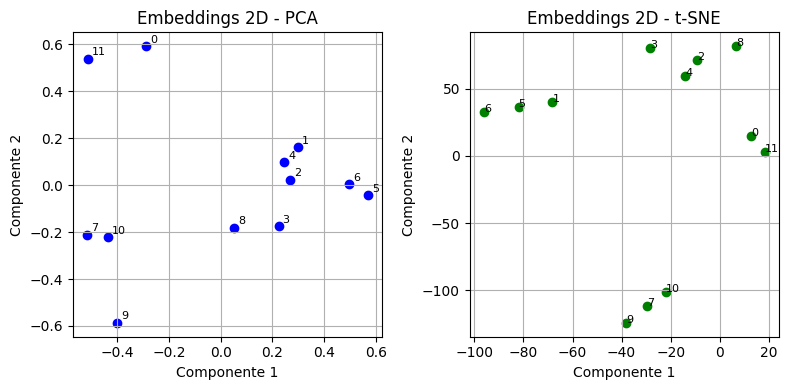


Frases correspondientes a cada índice:
0: PARKS is a celebration of the US National Parks featuring illustrious art from Fifty-Nine Parks
1: 
In PARKS players will take on the role of two hikers as they trek through different trails across four seasons of the year
2:  While on the trail these hikers will take actions and collect memories of the places your hikers visit
3:  These memories are represented by various resource tokens like mountains and forests
4:  Collecting these memories in sets will allow players to trade them in to visit a National Park at the end of each hike
5: 
Each trail represents one season of the year and each season the trails will change and grow steadily longer
6:  The trails represented by tiles get shuffled in between each season and laid out anew for the next round
7:  Resources can be tough to come by especially when someone is at the place you’re trying to reachPARKS
8:  Campfires allow you to share a space and time with other hikers
9:  Canteens and Ge

In [22]:
# Crear figura con subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico PCA
axs[0].set_title("Embeddings 2D - PCA")
axs[0].set_xlabel("Componente 1")
axs[0].set_ylabel("Componente 2")
axs[0].grid(True)
for i, punto in enumerate(desc_embedded_pca):
    axs[0].scatter(punto[0], punto[1], color='blue')
    axs[0].text(punto[0] + 0.015, punto[1] + 0.015, str(i), fontsize=8)

# Gráfico t-SNE
axs[1].set_title("Embeddings 2D - t-SNE")
axs[1].set_xlabel("Componente 1")
axs[1].set_ylabel("Componente 2")
axs[1].grid(True)
for i, punto in enumerate(desc_embedded_tsne):
    axs[1].scatter(punto[0], punto[1], color='green')
    axs[1].text(punto[0] + 0.02, punto[1] + 0.02, str(i), fontsize=8)

plt.tight_layout()
plt.show()

# Mostrar las frases una vez
print("\nFrases correspondientes a cada índice:")
for i, frase in enumerate(desc_split):
    print(f"{i}: {frase}")

Notamos al comparar la frase 2 con la frase 4 y 1 en el gráfico y en el análisis de similitud que puntos con distancia euclediana baja (y similitud de coseno alta también) se encuentran muy cercano en PCA, y no es tanto así en t-SNE.

Esto se debe a que en un espacio reducido con PCA, dos frases con baja distancia euclidiana entre sus embeddings tienden a estar realmente cercanas en ese espacio, ya que PCA conserva relaciones lineales y distancias globales tanto como puede.

En cambio, en t-SNE, la distancia euclidiana en 2D no refleja fielmente las distancias reales en el espacio original, porque t-SNE preserva relaciones locales y vecindades, no distancias absolutas. Así, dos puntos cercanos en t-SNE son similares en términos de vecindad, pero no necesariamente en magnitud de distancia.

Sin embargo, hay que tener en cuenta tanto que estamos hablando de un espacio 512-dimensional, lo cual sufre un alto grado de maldición de la dimensionalidad, lo que explica que las distancias eucledianas no varíen tanto entre frases muy alejadas y muy cercanas, además de que los vectores están normalizados.

# Ejercicio 3

Análisis POS y NER

En este caso elegimos la tercera review, con un tamaño mayor, lo cual ayuda a encontrar más entidades.

In [23]:
reglas_posner = reglas[1]
reglas_posner = reglas_posner.replace("\n", "")
reglas_posner

' celebrates America’s national parks and features art from the Fifty-Nine Parks Print Series. Players take on the role of two hikers who will trek trails to see sites, observe wildlife, take photos, and visit national parks over the course of the game.RULEBOOK VERSION 1.1HENRYAUDUBONWatch how to play atPARKSGAME.COMPARKS •  Shuffle all the Park cards face down to form the Parks deck. Deal three face up into the top slots of the board and place the deck onto the Parks deck area on the top right of the board. GEAR •  Shuffle all the Gear cards face down to form the Gear deck. Deal three face up into the bot-tom Gear slots on the board and place the deck onto the Gear deck area on the bottom right of the board.BOARD & RESOURCES • Place the board in between all players. Place the two token trays to the left and right of the board where they are easily within reach of the players and return their lids to the box. Each tray holds all types of tokens and also Photos, forming the supply. CANT

Instalar gliner para hacer análisis NER.

In [24]:
!pip install gliner --quiet
from gliner import GLiNER

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46

Importar demás paquetes

In [25]:
# Splitting
from langchain.text_splitter import RecursiveCharacterTextSplitter
def jaccard_similarity(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0
def dice_similarity(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a) + len(set_b)
    return 2.0 * intersection / union

## Splitting

In [26]:
# El modelo de GLiNER tiene un límite de 380
chunk_size = 380
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=[".", "?", "!"]
    )
reglas_split = text_splitter.split_text(reglas_posner)
print(f"{len(reglas_split)} fragmentos")
print(f"Promedio de longitud de fragmentos {int(np.mean([len(x) for x in reglas_split]))}")
print(reglas_split[0])
print(reglas_split[1])

84 fragmentos
Promedio de longitud de fragmentos 308
celebrates America’s national parks and features art from the Fifty-Nine Parks Print Series. Players take on the role of two hikers who will trek trails to see sites, observe wildlife, take photos, and visit national parks over the course of the game.RULEBOOK VERSION 1.1HENRYAUDUBONWatch how to play atPARKSGAME
.COMPARKS •  Shuffle all the Park cards face down to form the Parks deck. Deal three face up into the top slots of the board and place the deck onto the Parks deck area on the top right of the board. GEAR •  Shuffle all the Gear cards face down to form the Gear deck


## NER

In [27]:
ner_model = GLiNER.from_pretrained("urchade/gliner_multi-v2.1")
_ = ner_model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

gliner_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.77k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [28]:
labels = ["place", "tools", "person", "board game piece"]

entidades_set = set()
entidades_por_frase = []
for r in reglas_split:
    entidades_por_frase.append(set())
    entidades = (ner_model.predict_entities(r, labels=labels, threshold=0.7))
    for entity in entidades:
        entidades_por_frase[-1].add((entity["text"], entity["label"]))
        entidades_set.add((entity["text"], entity["label"]))

print("Entidades de la primera frase: ")
print(entidades_por_frase[0])
print()

print(f"Se encontraron {len(entidades_set)} entidades en total:")
for entity in entidades_set:
    print(entity[0], "=>", entity[1])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Entidades de la primera frase: 
{('national parks', 'place'), ('America’s national parks', 'place'), ('Players', 'person')}

Se encontraron 69 entidades en total:
Visited Parks => place
America’s national parks => place
HIKER => person
Trailhead => place
Trail Site => place
token => board game piece
Travis D => person
national parks => place
Hiker => person
1ST SITE => place
SITE => place
Canteens => board game piece
Gear => board game piece
HikerNOTE => person
Players => person
Season deck => board game piece
You => person
here => place
pink player => person
board => board game piece
RangerEVENTS => person
Matt Aiken => person
Trail => board game piece
Trail End => place
Canteen => board game piece
Trail Sites => place
Camera => board game piece
SOLO  deck => board game piece
Parks => place
Henry Audubon => person
GEAR => board game piece
Trail => place
National Parks => place
Reserve a Park => place
Campfire => board game piece
CANTEEN => place
Park => place
Ranger => person
players 

## Análisis de similitud

Ahora, hacemos un análisis de similitud.

En este caso, no tendremos embeddings de las oraciones, sino que sus entidades, por lo que haremos un análisis de similitud con Dice y Jaccard, comparando los conjuntosd de entidades.

In [29]:
# En este caso, no tenemos embeddings, así que sólo hacemos similitud jaccard y Dice
def analizar_similitud_ner(entidades_por_frase, frases):
    entidades_base_set = entidades_por_frase[0]
    print(f"Frase base: {frases[0]}\nEntidades de la frase base: {entidades_base_set}")
    #print("Entidades:", entidades_base_set)
    for i, ents_frase in enumerate(entidades_por_frase[1:]):
        print(f"\nFrase {i+1}: {frases[i+1]}")
        print(f"Similitud Jaccard: {jaccard_similarity(entidades_base_set, ents_frase)}")
        print(f"Similitud Dice: {dice_similarity(entidades_base_set, ents_frase)}")
        print("Entidades:", ents_frase)


Analizamos las similitudes de las primeras 5 frases

In [30]:
analizar_similitud_ner(entidades_por_frase[:5], reglas_split[:5])

Frase base: celebrates America’s national parks and features art from the Fifty-Nine Parks Print Series. Players take on the role of two hikers who will trek trails to see sites, observe wildlife, take photos, and visit national parks over the course of the game.RULEBOOK VERSION 1.1HENRYAUDUBONWatch how to play atPARKSGAME
Entidades de la frase base: {('national parks', 'place'), ('America’s national parks', 'place'), ('Players', 'person')}

Frase 1: .COMPARKS •  Shuffle all the Park cards face down to form the Parks deck. Deal three face up into the top slots of the board and place the deck onto the Parks deck area on the top right of the board. GEAR •  Shuffle all the Gear cards face down to form the Gear deck
Similitud Jaccard: 0.0
Similitud Dice: 0.0
Entidades: {('Gear', 'board game piece'), ('GEAR', 'board game piece')}

Frase 2: . Deal three face up into the bot-tom Gear slots on the board and place the deck onto the Gear deck area on the bottom right of the board.BOARD & RESOURC

Cualquiera de estas dos métricas sería igual de correcta para este caso, comparando cuán parecidos son los conjuntos de entidades de las diferentes frases. Según el problema podría tener mejor performance una u otra.

# Ejercicio 4

Separación de datos por idioma

Instalar langdetect para detección de idiomas.

In [31]:
!pip install langdetect --quiet
from langdetect import detect
import os
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Ahora, creamos un dataframe de pandas con los idiomas de cada archivo:

In [32]:
idiomas_dict = {'Archivo': [], 'Idioma': []}
for root, _, files in os.walk('/content/datos'):
    for file in files:
        with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
            text = f.read()

        lang = detect(text)
        idiomas_dict['Archivo'].append(file)
        idiomas_dict['Idioma'].append(lang)
df_idiomas = pd.DataFrame.from_dict(idiomas_dict)
df_idiomas

,Archivo,Idioma
0,relaciones_parks.csv,en
1,htp_videos_es_6.txt,es
2,precios_parks.txt,en
3,texto_foros_strategy.txt,en
4,htp_videos_es_7.txt,es
5,texto_misutmeeple_contenido.txt,es
6,texto_foros_variants.txt,en
7,htp_videos_es_5.txt,es
8,reviews_videos_en_3.txt,en
9,reviews_videos_en_2.txt,en


# Ejercicio 5

Análisis de sentimientos de las reseñas

Para hacer análisis de sentimientos, se utilizará el modelo BERT tanto para tokenizar como para la clasificación.

In [33]:
!pip install transformers --quiet

In [34]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from langchain.text_splitter import RecursiveCharacterTextSplitter
import numpy as np

## Funciones para análisis de sentimientos

In [35]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Creamos un pipeline de clasificación
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


Como muchos de los fragmentos son extraídos de transcripciones de videos de Youtube, no tienen puntuación, lo que significa que debremos separar por espacios.

In [36]:
def splitting_text(text):
    chunk_size = 1024
    chunk_overlap = 64
    text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=chunk_size,
            chunk_overlap=chunk_overlap,
            separators=[" "],
        )
    return text_splitter.split_text(text)
def score_sentimiento(texto):
    result = nlp(texto)
    scores_sentimiento = []
    for r in result:
        scores_sentimiento.append(int(r["label"][0]))
    return np.mean(scores_sentimiento)

## Análisis de las diferentes reseñas

In [37]:
print("Puntajes del 1 al 5:")
for i, review in enumerate(reviews):
    review_split = splitting_text(review)
    sentiment = score_sentimiento(review_split)

    print(f"Puntaje según la reseña {i}: {sentiment}")


Puntajes del 1 al 5:
Puntaje según la reseña 0: 3.5833333333333335
Puntaje según la reseña 1: 2.111111111111111
Puntaje según la reseña 2: 3.8
Puntaje según la reseña 3: 2.823529411764706
Puntaje según la reseña 4: 3.2941176470588234
Puntaje según la reseña 5: 3.0
Puntaje según la reseña 6: 2.2972972972972974
Puntaje según la reseña 7: 4.0
Puntaje según la reseña 8: 3.0


# Ejercicio 6

Clasificador de consultas

In [38]:
# Procesamiento datos
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from sklearn.preprocessing import LabelEncoder
# Modelos
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers
# Evaluación
from sklearn.metrics import classification_report

### Archivo

In [39]:
queries = """query,categoria
¿Para cuantos jugadores esta disenado Parks?,Estadisticas
¿Cual es el tiempo promedio de una partida?,Estadisticas
¿Desde que edad se recomienda jugar?,Estadisticas
¿Que nivel de complejidad tiene el juego?,Estadisticas
¿Cual es la puntuacion del juego en BGG?,Estadisticas
¿Cuantos votos tiene el juego en total?,Estadisticas
¿Cuantas personas tienen el juego registrado?,Estadisticas
¿Cuantas personas quieren tener el juego?,Estadisticas
¿Cuantas partidas se han registrado?,Estadisticas
¿Cuantos fans tiene el juego?,Estadisticas
¿Cuantos comentarios hay sobre el juego?,Estadisticas
¿Cual es el precio promedio del juego?,Estadisticas
¿Donde puedo comprar Parks mas barato?,Estadisticas
¿En que tiendas esta disponible Parks?,Estadisticas
¿Hay alguna edicion especial con mas componentes?,Estadisticas
¿Que peso (complejidad) tiene en la escala de BGG?,Estadisticas
¿Cuantos tokens trae el juego?,Estadisticas
¿Cuantos tableros individuales tiene?,Estadisticas
¿Cuantas cartas vienen en la caja base?,Estadisticas
¿Cuantas expansiones tiene Parks?,Estadisticas
¿Puedo jugar Parks en solitario?,Estadisticas
¿Hay estadisticas de victoria por jugador?,Estadisticas
¿Cuantas veces ha sido puntuado con 10?,Estadisticas
¿Que porcentaje de partidas son ganadas por primer jugador?,Estadisticas
¿Hay diferencias en duracion entre 2 y 4 jugadores?,Estadisticas
¿Cuantos componentes totales trae?,Estadisticas
¿Cual es el ratio de comentarios positivos?,Estadisticas
¿En que consiste Parks?,Informacion
¿De que trata Parks?,Informacion
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Puedo cambiar de ruta durante una ronda?,Informacion
¿Los recursos se comparten entre jugadores?,Informacion
¿Hay penalizacion por llegar ultimo al final del sendero?,Informacion
¿Que hago si dos jugadores llegan al mismo espacio?,Informacion
¿Los animales sirven para algo en el juego?,Informacion
¿Para que sirven las cantimploras?,Informacion
¿Hay formas de ganar mas puntos con las fotos?,Informacion
¿Que ocurre si no puedo pagar para visitar un parque?,Informacion
¿Las estaciones afectan las reglas?,Informacion
¿Los tokens de clima se aplican a todos?,Informacion
¿Hay reglas especificas para dos jugadores?,Informacion
¿Se puede guardar el progreso de una partida?,Informacion
¿Hay variantes de reglas?,Informacion
¿Se puede combinar Parks con su expansion?,Informacion
¿Que incluye la caja base del juego?,Informacion
¿Los senderos cambian entre rondas?,Informacion
¿El orden de turno puede cambiar?,Informacion
¿Se puede jugar en equipos?,Informacion
¿Hay condiciones especiales de victoria?,Informacion
¿Hay cartas de evento o sorpresa?,Informacion
¿Se pueden hacer alianzas?,Informacion
¿Se puede perder en Parks?,Informacion
¿Es necesario conocer la expansion para jugar?,Informacion
¿Quien diseno Parks?,Relaciones
¿A que editorial pertenece Parks?,Relaciones
¿Bajo que nombres alternativos se conoce Parks?,Relaciones
¿En que ano fue lanzado el juego?,Relaciones
¿Parks ha ganado algun premio?,Relaciones
¿Que otros juegos ha creado el disenador de Parks?,Relaciones
¿Quien ilustro el juego Parks?,Relaciones
¿Que otros juegos ha ilustrado el artista de Parks?,Relaciones
¿Parks forma parte de una serie de juegos?,Relaciones
¿Hay juegos relacionados creados por la misma editorial?,Relaciones
¿Hay colaboraciones entre el disenador de Parks y otros creadores?,Relaciones
¿La editorial de Parks ha producido otros juegos famosos?,Relaciones
¿Parks tiene versiones digitales?,Relaciones
¿Existe una app de Parks?,Relaciones
¿Hay una version print and play oficial?,Relaciones
¿Parks esta traducido a otros idiomas?,Relaciones
¿Hay ediciones especiales para ciertos paises?,Relaciones
¿La expansion fue creada por el mismo equipo?,Relaciones
¿En que eventos fue presentado Parks?,Relaciones
¿Parks esta inspirado en algun otro juego?,Relaciones
¿El disenador ha trabajado con otras editoriales?,Relaciones
¿Parks ha sido resenado por canales famosos?,Relaciones
¿Hay entrevistas con los creadores de Parks?,Relaciones
¿La editorial de Parks ha hecho campanas de Kickstarter?,Relaciones
¿La idea del juego fue propia o licenciada?,Relaciones
¿Parks tuvo prototipos anteriores?,Relaciones
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Que pasa si dos jugadores llegan al mismo espacio?,Informacion
¿Para que sirven los tokens de sol?,Informacion
¿Como se usan las cartas de equipo?,Informacion
¿Que es una caminata en Parks?,Informacion
¿Que representa el parque en el juego?,Informacion
¿Cual es la funcion del cantimplora?,Informacion
¿Que tipos de clima se pueden presentar?,Informacion
¿Que diferencia hay entre la primera y segunda edicion?,Informacion
¿Que pasa si no puedo visitar un parque al final del sendero?,Informacion
¿Puedo llevar mas de una cantimplora?,Informacion
¿Como se obtiene una carta de ano?,Informacion
¿Cuantas cartas de parque hay en el juego?,Informacion
¿Que acciones puedo hacer en mi turno?,Informacion
¿Que significa el simbolo de camara?,Informacion
¿Hay expansion del juego? ¿Que incluye?,Informacion
¿Que estrategias recomiendan para principiantes?,Informacion
¿Cual es la duracion tipica de una partida?,Informacion
¿Es recomendable para jugar con ninos?,Informacion
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Que pasa si dos jugadores llegan al mismo espacio?,Informacion
¿Para que sirven los tokens de sol?,Informacion
¿Como se usan las cartas de equipo?,Informacion
¿Que es una caminata en Parks?,Informacion
¿Que representa el parque en el juego?,Informacion
¿Cual es la funcion del cantimplora?,Informacion
¿Que tipos de clima se pueden presentar?,Informacion
¿Que diferencia hay entre la primera y segunda edicion?,Informacion
¿Que pasa si no puedo visitar un parque al final del sendero?,Informacion
¿Puedo llevar mas de una cantimplora?,Informacion
¿Como se obtiene una carta de ano?,Informacion
¿Cuantas cartas de parque hay en el juego?,Informacion
¿Que acciones puedo hacer en mi turno?,Informacion
¿Que significa el simbolo de camara?,Informacion
¿Hay expansion del juego? ¿Que incluye?,Informacion
¿Que estrategias recomiendan para principiantes?,Informacion
¿Cual es la duracion tipica de una partida?,Informacion
¿Es recomendable para jugar con ninos?,Informacion
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Que pasa si dos jugadores llegan al mismo espacio?,Informacion
¿Para que sirven los tokens de sol?,Informacion
¿Como se usan las cartas de equipo?,Informacion
¿Que es una caminata en Parks?,Informacion
¿Que representa el parque en el juego?,Informacion
¿Cual es la funcion del cantimplora?,Informacion
¿Que tipos de clima se pueden presentar?,Informacion
¿Que diferencia hay entre la primera y segunda edicion?,Informacion
¿Que pasa si no puedo visitar un parque al final del sendero?,Informacion
¿Puedo llevar mas de una cantimplora?,Informacion
¿Como se obtiene una carta de ano?,Informacion
¿Cuantas cartas de parque hay en el juego?,Informacion
¿Que acciones puedo hacer en mi turno?,Informacion
¿Que significa el simbolo de camara?,Informacion
¿Hay expansion del juego? ¿Que incluye?,Informacion
¿Que estrategias recomiendan para principiantes?,Informacion
¿Cual es la duracion tipica de una partida?,Informacion
¿Es recomendable para jugar con ninos?,Informacion
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Que pasa si dos jugadores llegan al mismo espacio?,Informacion
¿Para que sirven los tokens de sol?,Informacion
¿Como se usan las cartas de equipo?,Informacion
¿Que es una caminata en Parks?,Informacion
¿Que representa el parque en el juego?,Informacion
¿Cual es la funcion del cantimplora?,Informacion
¿Que tipos de clima se pueden presentar?,Informacion
¿Que diferencia hay entre la primera y segunda edicion?,Informacion
¿Que pasa si no puedo visitar un parque al final del sendero?,Informacion
¿Puedo llevar mas de una cantimplora?,Informacion
¿Como se obtiene una carta de ano?,Informacion
¿Cuantas cartas de parque hay en el juego?,Informacion
¿Que acciones puedo hacer en mi turno?,Informacion
¿Que significa el simbolo de camara?,Informacion
¿Hay expansion del juego? ¿Que incluye?,Informacion
¿Que estrategias recomiendan para principiantes?,Informacion
¿Cual es la duracion tipica de una partida?,Informacion
¿Es recomendable para jugar con ninos?,Informacion
¿Como se juega Parks?,Informacion
¿Cuales son las reglas basicas de Parks?,Informacion
¿Que pasa si dos jugadores llegan al mismo espacio?,Informacion
¿Para que sirven los tokens de sol?,Informacion
¿Como se usan las cartas de equipo?,Informacion
¿Que es una caminata en Parks?,Informacion
¿Que representa el parque en el juego?,Informacion
¿Cual es la funcion del cantimplora?,Informacion
¿Que tipos de clima se pueden presentar?,Informacion
¿Que diferencia hay entre la primera y segunda edicion?,Informacion
¿Que pasa si no puedo visitar un parque al final del sendero?,Informacion
¿Puedo llevar mas de una cantimplora?,Informacion
¿Como se obtiene una carta de ano?,Informacion
¿Cuantas cartas de parque hay en el juego?,Informacion
¿Que acciones puedo hacer en mi turno?,Informacion
¿Que significa el simbolo de camara?,Informacion
¿Hay expansion del juego? ¿Que incluye?,Informacion
¿Que estrategias recomiendan para principiantes?,Informacion
¿Cual es la duracion tipica de una partida?,Informacion
¿Es recomendable para jugar con ninos?,Informacion
¿Cuantas cartas de parque hay en total?,Estadisticas
¿Cuantas fichas de recurso hay?,Estadisticas
¿Cual es la valoracion del juego en BoardGameGeek?,Estadisticas
¿Que puntaje tiene Parks en Amazon?,Estadisticas
¿Que edad minima recomienda el fabricante?,Estadisticas
¿Cuanto tiempo promedio dura una partida?,Estadisticas
¿Cuantos jugadores admite el juego?,Estadisticas
¿Cuantas copias se han vendido a nivel mundial?,Estadisticas
¿Cuantos tokens de sol vienen en la caja?,Estadisticas
¿Cuantos tokens de agua incluye el juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Cual es el precio promedio en Europa?,Estadisticas
¿Cuantas expansiones oficiales existen?,Estadisticas
¿Cual es el peso del juego embalado?,Estadisticas
¿Cuantas veces ha sido calificado en BGG?,Estadisticas
¿Cuantas cartas de ano hay disponibles?,Estadisticas
¿Cual es el tamano promedio del tablero?,Estadisticas
¿Cuantas copias se imprimieron en la primera edicion?,Estadisticas
¿Cual es la relacion de votos positivos/negativos en resenas?,Estadisticas
¿Cuantas piezas totales trae el juego?,Estadisticas
¿Cuantas cartas de parque hay en total?,Estadisticas
¿Cuantas fichas de recurso hay?,Estadisticas
¿Cual es la valoracion del juego en BoardGameGeek?,Estadisticas
¿Que puntaje tiene Parks en Amazon?,Estadisticas
¿Que edad minima recomienda el fabricante?,Estadisticas
¿Cuanto tiempo promedio dura una partida?,Estadisticas
¿Cuantos jugadores admite el juego?,Estadisticas
¿Cuantas copias se han vendido a nivel mundial?,Estadisticas
¿Cuantos tokens de sol vienen en la caja?,Estadisticas
¿Cuantos tokens de agua incluye el juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Cual es el precio promedio en Europa?,Estadisticas
¿Cuantas expansiones oficiales existen?,Estadisticas
¿Cual es el peso del juego embalado?,Estadisticas
¿Cuantas veces ha sido calificado en BGG?,Estadisticas
¿Cuantas cartas de ano hay disponibles?,Estadisticas
¿Cual es el tamano promedio del tablero?,Estadisticas
¿Cuantas copias se imprimieron en la primera edicion?,Estadisticas
¿Cual es la relacion de votos positivos/negativos en resenas?,Estadisticas
¿Cuantas piezas totales trae el juego?,Estadisticas
¿Cuantas cartas de parque hay en total?,Estadisticas
¿Cuantas fichas de recurso hay?,Estadisticas
¿Cual es la valoracion del juego en BoardGameGeek?,Estadisticas
¿Que puntaje tiene Parks en Amazon?,Estadisticas
¿Que edad minima recomienda el fabricante?,Estadisticas
¿Cuanto tiempo promedio dura una partida?,Estadisticas
¿Cuantos jugadores admite el juego?,Estadisticas
¿Cuantas copias se han vendido a nivel mundial?,Estadisticas
¿Cuantos tokens de sol vienen en la caja?,Estadisticas
¿Cuantos tokens de agua incluye el juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Cual es el precio promedio en Europa?,Estadisticas
¿Cuantas expansiones oficiales existen?,Estadisticas
¿Cual es el peso del juego embalado?,Estadisticas
¿Cuantas veces ha sido calificado en BGG?,Estadisticas
¿Cuantas cartas de ano hay disponibles?,Estadisticas
¿Cual es el tamano promedio del tablero?,Estadisticas
¿Cuantas copias se imprimieron en la primera edicion?,Estadisticas
¿Cual es la relacion de votos positivos/negativos en resenas?,Estadisticas
¿Cuantas piezas totales trae el juego?,Estadisticas
¿Cuantas cartas de parque hay en total?,Estadisticas
¿Cuantas fichas de recurso hay?,Estadisticas
¿Cual es la valoracion del juego en BoardGameGeek?,Estadisticas
¿Que puntaje tiene Parks en Amazon?,Estadisticas
¿Que edad minima recomienda el fabricante?,Estadisticas
¿Cuanto tiempo promedio dura una partida?,Estadisticas
¿Cuantos jugadores admite el juego?,Estadisticas
¿Cuantas copias se han vendido a nivel mundial?,Estadisticas
¿Cuantos tokens de sol vienen en la caja?,Estadisticas
¿Cuantos tokens de agua incluye el juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Cual es el precio promedio en Europa?,Estadisticas
¿Cuantas expansiones oficiales existen?,Estadisticas
¿Cual es el peso del juego embalado?,Estadisticas
¿Cuantas veces ha sido calificado en BGG?,Estadisticas
¿Cuantas cartas de ano hay disponibles?,Estadisticas
¿Cual es el tamano promedio del tablero?,Estadisticas
¿Cuantas copias se imprimieron en la primera edicion?,Estadisticas
¿Cual es la relacion de votos positivos/negativos en resenas?,Estadisticas
¿Cuantas piezas totales trae el juego?,Estadisticas
¿Cuantas cartas de parque hay en total?,Estadisticas
¿Cuantas fichas de recurso hay?,Estadisticas
¿Cual es la valoracion del juego en BoardGameGeek?,Estadisticas
¿Que puntaje tiene Parks en Amazon?,Estadisticas
¿Que edad minima recomienda el fabricante?,Estadisticas
¿Cuanto tiempo promedio dura una partida?,Estadisticas
¿Cuantos jugadores admite el juego?,Estadisticas
¿Cuantas copias se han vendido a nivel mundial?,Estadisticas
¿Cuantos tokens de sol vienen en la caja?,Estadisticas
¿Cuantos tokens de agua incluye el juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Cual es el precio promedio en Europa?,Estadisticas
¿Cuantas expansiones oficiales existen?,Estadisticas
¿Cual es el peso del juego embalado?,Estadisticas
¿Cuantas veces ha sido calificado en BGG?,Estadisticas
¿Cuantas cartas de ano hay disponibles?,Estadisticas
¿Cual es el tamano promedio del tablero?,Estadisticas
¿Cuantas copias se imprimieron en la primera edicion?,Estadisticas
¿Cual es la relacion de votos positivos/negativos en resenas?,Estadisticas
¿Cuantas piezas totales trae el juego?,Estadisticas
¿Quien diseno el juego Parks?,Relaciones
¿Que editorial publico el juego?,Relaciones
¿Que otros juegos diseno el creador de Parks?,Relaciones
¿Quien ilustro las cartas del juego?,Relaciones
¿Parks esta basado en otro juego?,Relaciones
¿Que relacion tiene Keymaster Games con Parks?,Relaciones
¿Los creadores han hecho otros juegos exitosos?,Relaciones
¿Como se llama el ilustrador principal?,Relaciones
¿Que estudio de arte colaboro en el diseno?,Relaciones
¿Quien compuso la musica del trailer promocional?,Relaciones
¿Parks tiene un nombre alternativo en otros idiomas?,Relaciones
¿La editorial ha trabajado con otros disenadores?,Relaciones
¿Hay colaboraciones con el Servicio de Parques Nacionales?,Relaciones
¿Que premios ha ganado el disenador del juego?,Relaciones
¿Donde se imprimio originalmente el juego?,Relaciones
¿Que relacion hay entre Parks y Trails?,Relaciones
¿Los autores han trabajado en expansiones?,Relaciones
¿Que disenador colaboro en la expansion Nightfall?,Relaciones
¿Que proyectos futuros tienen los disenadores?,Relaciones
¿Con que artista visual se vinculo la segunda edicion?,Relaciones
¿Quien diseno el juego Parks?,Relaciones
¿Que editorial publico el juego?,Relaciones
¿Que otros juegos diseno el creador de Parks?,Relaciones
¿Quien ilustro las cartas del juego?,Relaciones
¿Parks esta basado en otro juego?,Relaciones
¿Que relacion tiene Keymaster Games con Parks?,Relaciones
¿Los creadores han hecho otros juegos exitosos?,Relaciones
¿Como se llama el ilustrador principal?,Relaciones
¿Que estudio de arte colaboro en el diseno?,Relaciones
¿Quien compuso la musica del trailer promocional?,Relaciones
¿Parks tiene un nombre alternativo en otros idiomas?,Relaciones
¿La editorial ha trabajado con otros disenadores?,Relaciones
¿Hay colaboraciones con el Servicio de Parques Nacionales?,Relaciones
¿Que premios ha ganado el disenador del juego?,Relaciones
¿Donde se imprimio originalmente el juego?,Relaciones
¿Que relacion hay entre Parks y Trails?,Relaciones
¿Los autores han trabajado en expansiones?,Relaciones
¿Que disenador colaboro en la expansion Nightfall?,Relaciones
¿Que proyectos futuros tienen los disenadores?,Relaciones
¿Con que artista visual se vinculo la segunda edicion?,Relaciones
¿Quien diseno el juego Parks?,Relaciones
¿Que editorial publico el juego?,Relaciones
¿Que otros juegos diseno el creador de Parks?,Relaciones
¿Quien ilustro las cartas del juego?,Relaciones
¿Parks esta basado en otro juego?,Relaciones
¿Que relacion tiene Keymaster Games con Parks?,Relaciones
¿Los creadores han hecho otros juegos exitosos?,Relaciones
¿Como se llama el ilustrador principal?,Relaciones
¿Que estudio de arte colaboro en el diseno?,Relaciones
¿Quien compuso la musica del trailer promocional?,Relaciones
¿Parks tiene un nombre alternativo en otros idiomas?,Relaciones
¿La editorial ha trabajado con otros disenadores?,Relaciones
¿Hay colaboraciones con el Servicio de Parques Nacionales?,Relaciones
¿Que premios ha ganado el disenador del juego?,Relaciones
¿Donde se imprimio originalmente el juego?,Relaciones
¿Que relacion hay entre Parks y Trails?,Relaciones
¿Los autores han trabajado en expansiones?,Relaciones
¿Que disenador colaboro en la expansion Nightfall?,Relaciones
¿Que proyectos futuros tienen los disenadores?,Relaciones
¿Con que artista visual se vinculo la segunda edicion?,Relaciones
¿Quien diseno el juego Parks?,Relaciones
¿Que editorial publico el juego?,Relaciones
¿Que otros juegos diseno el creador de Parks?,Relaciones
¿Quien ilustro las cartas del juego?,Relaciones
¿Parks esta basado en otro juego?,Relaciones
¿Que relacion tiene Keymaster Games con Parks?,Relaciones
¿Los creadores han hecho otros juegos exitosos?,Relaciones
¿Como se llama el ilustrador principal?,Relaciones
¿Que estudio de arte colaboro en el diseno?,Relaciones
¿Quien compuso la musica del trailer promocional?,Relaciones
¿Parks tiene un nombre alternativo en otros idiomas?,Relaciones
¿La editorial ha trabajado con otros disenadores?,Relaciones
¿Hay colaboraciones con el Servicio de Parques Nacionales?,Relaciones
¿Que premios ha ganado el disenador del juego?,Relaciones
¿Donde se imprimio originalmente el juego?,Relaciones
¿Que relacion hay entre Parks y Trails?,Relaciones
¿Los autores han trabajado en expansiones?,Relaciones
¿Que disenador colaboro en la expansion Nightfall?,Relaciones
¿Que proyectos futuros tienen los disenadores?,Relaciones
¿Con que artista visual se vinculo la segunda edicion?,Relaciones
¿Quien diseno el juego Parks?,Relaciones
¿Que editorial publico el juego?,Relaciones
¿Que otros juegos diseno el creador de Parks?,Relaciones
¿Quien ilustro las cartas del juego?,Relaciones
¿Parks esta basado en otro juego?,Relaciones
¿Que relacion tiene Keymaster Games con Parks?,Relaciones
¿Los creadores han hecho otros juegos exitosos?,Relaciones
¿Como se llama el ilustrador principal?,Relaciones
¿Que estudio de arte colaboro en el diseno?,Relaciones
¿Quien compuso la musica del trailer promocional?,Relaciones
¿Parks tiene un nombre alternativo en otros idiomas?,Relaciones
¿La editorial ha trabajado con otros disenadores?,Relaciones
¿Hay colaboraciones con el Servicio de Parques Nacionales?,Relaciones
¿Que premios ha ganado el disenador del juego?,Relaciones
¿Donde se imprimio originalmente el juego?,Relaciones
¿Que relacion hay entre Parks y Trails?,Relaciones
¿Los autores han trabajado en expansiones?,Relaciones
¿Que disenador colaboro en la expansion Nightfall?,Relaciones
¿Que proyectos futuros tienen los disenadores?,Relaciones
¿Con que artista visual se vinculo la segunda edicion?,Relaciones
¿Hay forma de conseguir Parks en formato digital?,Relaciones
¿Parks esta disponible en Tabletop Simulator?,Relaciones
¿Quien distribuye Parks en America Latina?,Relaciones
¿En que ferias se ha exhibido Parks?,Relaciones
¿El autor de Parks es conocido por otros juegos?,Relaciones
¿La editorial de Parks ha ganado premios?,Relaciones
¿Hay merchandising oficial de Parks?,Relaciones
¿Hay contenido fanmade aprobado oficialmente?,Relaciones
¿Parks fue financiado mediante crowdfunding?,Relaciones
¿Que editorial distribuye Parks en Europa?,Relaciones
¿Parks tiene spin-offs o versiones alternativas?,Relaciones
¿Hay comics libros o material narrativo de Parks?,Relaciones
¿La musica del juego fue compuesta por alguien especifico?,Relaciones
¿Hay posters oficiales del arte de Parks?,Relaciones
¿Parks esta basado en algun parque real?,Relaciones
¿Hay entrevistas con los ilustradores del juego?,Relaciones
¿La expansion fue planeada desde el principio?,Relaciones
¿Hay versiones licenciadas de Parks en Asia?,Relaciones
¿Parks tiene algun juego hermano con mecanicas similares?,Relaciones
¿Parks ha sido versionado por otras editoriales?,Relaciones
¿Que tipos de cartas hay en Parks?,Informacion
¿Como se utilizan las fotos?,Informacion
¿Que es una reserva en Parks?,Informacion
¿Las reglas cambian con la expansion?,Informacion
¿Puedo usar mas de una cantimplora por turno?,Informacion
¿Que pasa si se acaban los recursos?,Informacion
¿Como funciona el marcador de ano?,Informacion
¿Se pueden modificar los senderos?,Informacion
¿Como se consiguen mas recursos?,Informacion
¿Se pueden robar parques visitados?,Informacion
¿Hay cartas que interactuan con otros jugadores?,Informacion
¿Puedo cambiar recursos con otros jugadores?,Informacion
¿Hay penalizacion por no completar una accion?,Informacion
¿Se puede jugar sin las estaciones?,Informacion
¿Las cartas de parque son unicas?,Informacion
¿Que recursos se utilizan para visitar parques?,Informacion
¿Las acciones se resuelven inmediatamente?,Informacion
¿Las reglas permiten jugadores eliminados?,Informacion
¿Que pasa si no me muevo?,Informacion
¿Las estaciones determinan los recursos disponibles?,Informacion
¿Cuantos recursos hay de cada tipo?,Estadisticas
¿Cuantos tokens de clima hay?,Estadisticas
¿Cuantas cartas de parque incluye la caja base?,Estadisticas
¿Hay alguna estadistica sobre dificultad?,Estadisticas
¿La comunidad considera Parks facil o dificil?,Estadisticas
¿Cuantos tokens de animales hay?,Estadisticas
¿Cuantas cartas de reserva existen?,Estadisticas
¿Cuantos tipos de recursos hay?,Estadisticas
¿Cuantas estaciones diferentes hay?,Estadisticas
¿Que cantidad de componentes trae la expansion?,Estadisticas
¿Se han registrado mas de 10.000 partidas?,Estadisticas
¿En que posicion del ranking general esta Parks?,Estadisticas
¿Cual es la valoracion promedio en Amazon?,Estadisticas
¿Que porcentaje de usuarios le da 5 estrellas?,Estadisticas
¿Cuanto mide la caja de Parks?,Estadisticas
¿Cual es el peso del juego?,Estadisticas
¿Que precio tiene Parks en Argentina?,Estadisticas
¿Es mas barato comprar Parks en Europa o EE.UU.?,Estadisticas
¿Parks esta entre los 100 mas votados?,Estadisticas
¿Cuantas personas han subido fotos del juego?,Estadisticas
¿Puedo visitar mas de un parque por ronda?,Informacion
¿Hay limite de cartas en mano?,Informacion
¿Las fotos tienen usos distintos segun el jugador?,Informacion
¿Es necesario usar todas las cantimploras?,Informacion
¿Los recursos se conservan entre rondas?,Informacion
¿Puedo modificar el orden de mis acciones?,Informacion
¿Hay formas de bloquear a otros jugadores?,Informacion
¿Las rutas pueden dividirse?,Informacion
¿Es legal tomar el mismo recurso dos veces?,Informacion
¿Las cartas tienen texto o solo simbolos?,Informacion
¿Se puede jugar con ninos pequenos?,Informacion
¿Hay contenido sensible en el juego?,Informacion
¿Las ilustraciones son realistas o estilizadas?,Informacion
¿Se puede usar una carta de reserva sin pagar?,Informacion
¿Las cartas tienen habilidades especiales?,Informacion
¿Se puede jugar una partida corta?,Informacion
¿Hay tableros asimetricos para cada jugador?,Informacion
¿El turno es simultaneo o por orden?,Informacion
¿Los senderos son aleatorios en cada ronda?,Informacion
¿Puedo jugar sin conocer todas las reglas?,Informacion
¿El disenador de Parks participo en la expansion?,Relaciones
¿Parks es parte de una linea ecologica de la editorial?,Relaciones
¿Hay entrevistas en YouTube sobre la creacion del juego?,Relaciones
¿La editorial de Parks ha hecho juegos educativos?,Relaciones
¿Hay juegos anteriores del mismo universo?,Relaciones
¿Parks fue desarrollado internamente o subcontratado?,Relaciones
¿La expansion tiene ilustraciones del mismo artista?,Relaciones
¿Quien escribio las reglas del juego?,Relaciones
¿Parks ha sido versionado como videojuego?,Relaciones
¿Hay canales que recomiendan Parks para familias?,Relaciones
¿Hay versiones adaptadas para colegios?,Relaciones
¿El autor de Parks ha hecho juegos infantiles?,Relaciones
¿Parks fue inspirado por experiencias personales del autor?,Relaciones
¿Parks incluye texto en sus componentes?,Relaciones
¿El arte fue comisionado por la editorial o licenciado?,Relaciones
¿En que consiste el juego Parks?,Informacion
¿Cual es el objetivo de Parks?,Informacion
¿Como se gana una partida de Parks?,Informacion
¿Puedo usar mas de una cantimplora por turno?,Informacion
¿Que hago si no puedo pagar un parque?,Informacion
¿Se pueden guardar recursos entre rondas?,Informacion
¿Que representan las fotos en Parks?,Informacion
¿Para que sirven los tokens de clima?,Informacion
¿Como se usan las cartas de reserva?,Informacion
¿Puedo cambiar de ruta en una ronda?,Informacion
¿Los parques tienen habilidades especiales?,Informacion
¿Las estaciones afectan la disponibilidad de recursos?,Informacion
¿El orden de turno cambia durante el juego?,Informacion
¿Que tipos de recursos hay en Parks?,Informacion
¿Los senderos cambian cada ronda?,Informacion
¿Puedo usar habilidades de cartas varias veces?,Informacion
¿Que pasa si dos jugadores eligen el mismo espacio?,Informacion
¿Hay un limite de cartas de parque que puedo tener?,Informacion
¿Se puede jugar Parks sin la expansion?,Informacion
¿Hay interaccion entre jugadores en Parks?,Informacion
¿Que pasa si no quiero realizar una accion?,Informacion
¿Las reglas cambian con menos jugadores?,Informacion
¿Puedo jugar Parks con ninos?,Informacion
¿Hay mecanicas de construccion de mazo?,Informacion
¿Se pueden modificar los senderos?,Informacion
¿Que tipo de decisiones estrategicas tiene Parks?,Informacion
¿Puedo usar recursos en el mismo turno en que los obtengo?,Informacion
¿Hay eventos aleatorios en el juego?,Informacion
¿Se pueden tomar atajos en los senderos?,Informacion
¿Las fotos valen puntos al final?,Informacion
¿Los tokens de animal se usan igual que los recursos?,Informacion
¿Puedo jugar sin usar las cartas de reserva?,Informacion
¿Se puede jugar sin las estaciones?,Informacion
¿Las cantimploras son obligatorias?,Informacion
¿Puedo tener mas de una carta de reserva?,Informacion
¿Hay una preparacion diferente segun numero de jugadores?,Informacion
¿Parks tiene reglas de desempate?,Informacion
¿Puedo pasar mi turno?,Informacion
¿El juego tiene variantes para expertos?,Informacion
¿Los parques visitados se reponen?,Informacion
¿Las cartas de parque se revelan al azar?,Informacion
¿El sendero se forma igual en todas las rondas?,Informacion
¿Los componentes cambian segun la estacion?,Informacion
¿Las reglas permiten modificar el orden del sendero?,Informacion
¿Los efectos de las cartas se aplican inmediatamente?,Informacion
¿Se pueden combinar cantimploras y reserva en un turno?,Informacion
¿Hay turnos simultaneos en Parks?,Informacion
¿Puedo ignorar los efectos del clima?,Informacion
¿Las cartas de reserva se pierden si no se usan?,Informacion
¿Puedo visitar mas de un parque por ronda?,Informacion
¿Se puede compartir recursos con otros jugadores?,Informacion
¿Las reglas permiten juego en solitario?,Informacion
¿Hay penalizacion por no usar todos los recursos?,Informacion
¿Puedo cambiar una carta de parque por otra?,Informacion
¿Los tokens de animal pueden sustituir cualquier recurso?,Informacion
¿Las fotos tienen efectos ademas de puntos?,Informacion
¿Se pueden usar habilidades fuera del turno?,Informacion
¿Hay acciones obligatorias en el turno?,Informacion
¿El sendero tiene casillas especiales?,Informacion
¿Hay elementos ocultos en Parks?,Informacion
¿Las reglas cambian con la expansion?,Informacion
¿Se pueden guardar acciones para turnos siguientes?,Informacion
¿Hay elementos descartables durante la partida?,Informacion
¿Se pueden activar varias cantimploras en el mismo turno?,Informacion
¿Las estaciones se eligen o se sortean?,Informacion
¿Puedo ignorar el efecto de una estacion?,Informacion
¿Puedo modificar una reserva antes de usarla?,Informacion
¿Puedo perder recursos?,Informacion
¿Las acciones se resuelven en orden especifico?,Informacion
¿Puedo terminar mi ronda antes de tiempo?,Informacion
¿Puedo repetir parques visitados en distintas rondas?,Informacion
¿Las reglas permiten partidas rapidas?,Informacion
¿Hay una forma de puntuar mas fotos?,Informacion
¿El orden de los parques importa?,Informacion
¿Hay algun limite de tokens?,Informacion
¿Puedo construir una estrategia sin fotos?,Informacion
¿Puedo usar fotos para activar habilidades?,Informacion
¿Se puede perder una partida de Parks?,Informacion
¿Hay misiones u objetivos personales?,Informacion
¿Puedo cambiar recursos por puntos?,Informacion
¿Puedo mantener mis cartas entre rondas?,Informacion
¿Hay cartas de ayuda o referencia en Parks?,Informacion
¿Los senderos se mezclan al azar?,Informacion
¿Puedo jugar Parks por equipos?,Informacion
¿Hay fichas de bonificacion?,Informacion
¿Las estaciones afectan a todos los jugadores por igual?,Informacion
¿El juego permite combos de acciones?,Informacion
¿Las cantimploras tienen efectos unicos?,Informacion
¿Puedo personalizar el sendero en cada partida?,Informacion
¿Puedo usar habilidades de cartas de otros jugadores?,Informacion
¿Las reservas pueden ser robadas por otros jugadores?,Informacion
¿Las cartas tienen texto?,Informacion
¿Las ilustraciones afectan la mecanica?,Informacion
¿Puedo colocar varias piezas en una misma casilla?,Informacion
¿Hay reglas especificas para cada estacion?,Informacion
¿Puedo quedarme sin recursos durante el juego?,Informacion
¿Las cartas de parque tienen distintos niveles de dificultad?,Informacion
¿Puedo intercambiar parques visitados por beneficios?,Informacion
¿Hay algun efecto de final de partida?,Informacion
"""

#### Guardar

In [40]:
with open("queries.csv", "w") as f:
    f.write(queries)

## Preprocesamiento de datos

Preparamos los datos, importando y haciendo embedding de las oraciones.

In [41]:
df_queries = pd.read_csv("queries.csv", sep=",")
len(df_queries)

574

In [42]:
get_embeddings = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [43]:
# Preparar X e y
X = df_queries["query"]
y = df_queries["categoria"]

X_vectorized = np.vstack(X.apply(lambda x: get_embeddings([x]).numpy()[0]))
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

## Modelos

### Regresión logística

In [48]:
# Entrenamiento del modelo
clasificador_query_logreg = LogisticRegression(random_state=42)
clasificador_query_logreg.fit(X_train, y_train)

# Evaluación inicial
y_pred = clasificador_query_logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Estadisticas       0.97      0.97      0.97        30
 Informacion       0.92      0.98      0.95        50
  Relaciones       1.00      0.91      0.96        35

    accuracy                           0.96       115
   macro avg       0.96      0.95      0.96       115
weighted avg       0.96      0.96      0.96       115



Se ve un accuracy alto. Exploremos si esto es mejorable utilizando un modelo más poderoso.

### Red neuronal

In [45]:
# Para trabajar con redes neuronales, codificamos las clases como ints
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_test_int = label_encoder.transform(y_test)

In [46]:
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

clasificador_query_NN = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(len(y.unique()), activation='softmax')
])

clasificador_query_NN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

clasificador_query_NN.fit(X_train, y_train_int, epochs=30, batch_size=32, validation_split=0.2)

y_pred = clasificador_query_NN.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4318 - loss: 1.0751 - val_accuracy: 0.5435 - val_loss: 1.0356
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5396 - loss: 1.0049 - val_accuracy: 0.4783 - val_loss: 0.9697
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5440 - loss: 0.9242 - val_accuracy: 0.6196 - val_loss: 0.8985
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6321 - loss: 0.8362 - val_accuracy: 0.7065 - val_loss: 0.8235
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7618 - loss: 0.7447 - val_accuracy: 0.8261 - val_loss: 0.7448
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8576 - loss: 0.6528 - val_accuracy: 0.8804 - val_loss: 0.6689
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9077 - loss: 0.5672 - val_accuracy: 0.8804 - val_loss: 0.5974
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9213 - loss: 0.4888 - val_accuracy: 0.8913 - val

In [47]:
print(classification_report(y_test_int, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.91      0.98      0.94        50
           2       0.97      0.89      0.93        35

    accuracy                           0.95       115
   macro avg       0.96      0.94      0.95       115
weighted avg       0.95      0.95      0.95       115



Vemos que el performance no mejoró al utilizar este modelo con redes neuronales, por lo tanto, nos quedamos con el modelo de regresión logística, que además, es menos computacionalmente costoso.